In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.ndimage.filters import uniform_filter1d
from matplotlib.gridspec import GridSpec
import geopandas as gpd
import regionmask
from scipy.stats import linregress
import statsmodels.api as sm

from glob import glob

import matplotlib.path as mpath
import cartopy
import cartopy.crs as ccrs
crs_sp = ccrs.SouthPolarStereo(central_longitude=0)
crs_ll = ccrs.PlateCarree()

from cartopy.util import add_cyclic_point

In [2]:
def plot_timeseries(ax, fac, t, label, c1, c2, r = 'std', l = False):
    ax.plot(y, fac.quantile(0.5, dim='model'), color = c1, linewidth = 2)

    
    if r =='std':
        ax.fill_between(y, fac.quantile(0.25, dim='model'), fac.quantile(0.75, dim='model'), alpha=0.5, color = c2, label = label)
    elif r == 'full':
        ax.fill_between(y, fac.min(dim='model'), fac.max(dim='model'), alpha=0.5, color = c2, label = label)
    
    ax.set_ylim([0,23])
    ax.set_yticks([0,5,10,15,20])
    ax.tick_params('both', labelsize=18)
    ax.set_title(t, fontsize = 24,fontweight="bold")
    ax.set_ylabel('$FAC_e$ (m)', fontsize = 20)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    if l: ax.legend(prop={'size':18})

In [3]:
#deg0C run
west1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/a-b.nc')
all1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/all.nc')
amery1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/amery.nc')
dml1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/DML.nc')
victoria1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/victoria.nc')
pen1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/pen.nc')
rf1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/rf.nc')
ross1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/ross.nc')
wilkes1 = xr.open_dataset('/glade/work/devond/FAC/timeseries/deg0C/wilkes.nc')

y = all1.year

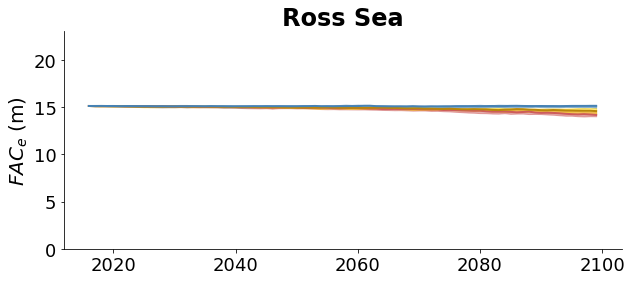

In [11]:
title = 'Victoria Land'
data = ross1
fig, ax = plt.subplots(1,1,figsize = (10,4))

plot_timeseries(ax,data.ssp5,title, 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax,data.ssp3,title, 'SSP3-7.0', 'darkgoldenrod','gold')
plot_timeseries(ax,data.ssp1,title, 'SSP1-2.6', 'steelblue', 'steelblue')

plt.savefig(f'timeseries/deg0C/figures/{title}.png', dpi = 300, bbox_inches = 'tight', transparent = True)

## Region timeseries

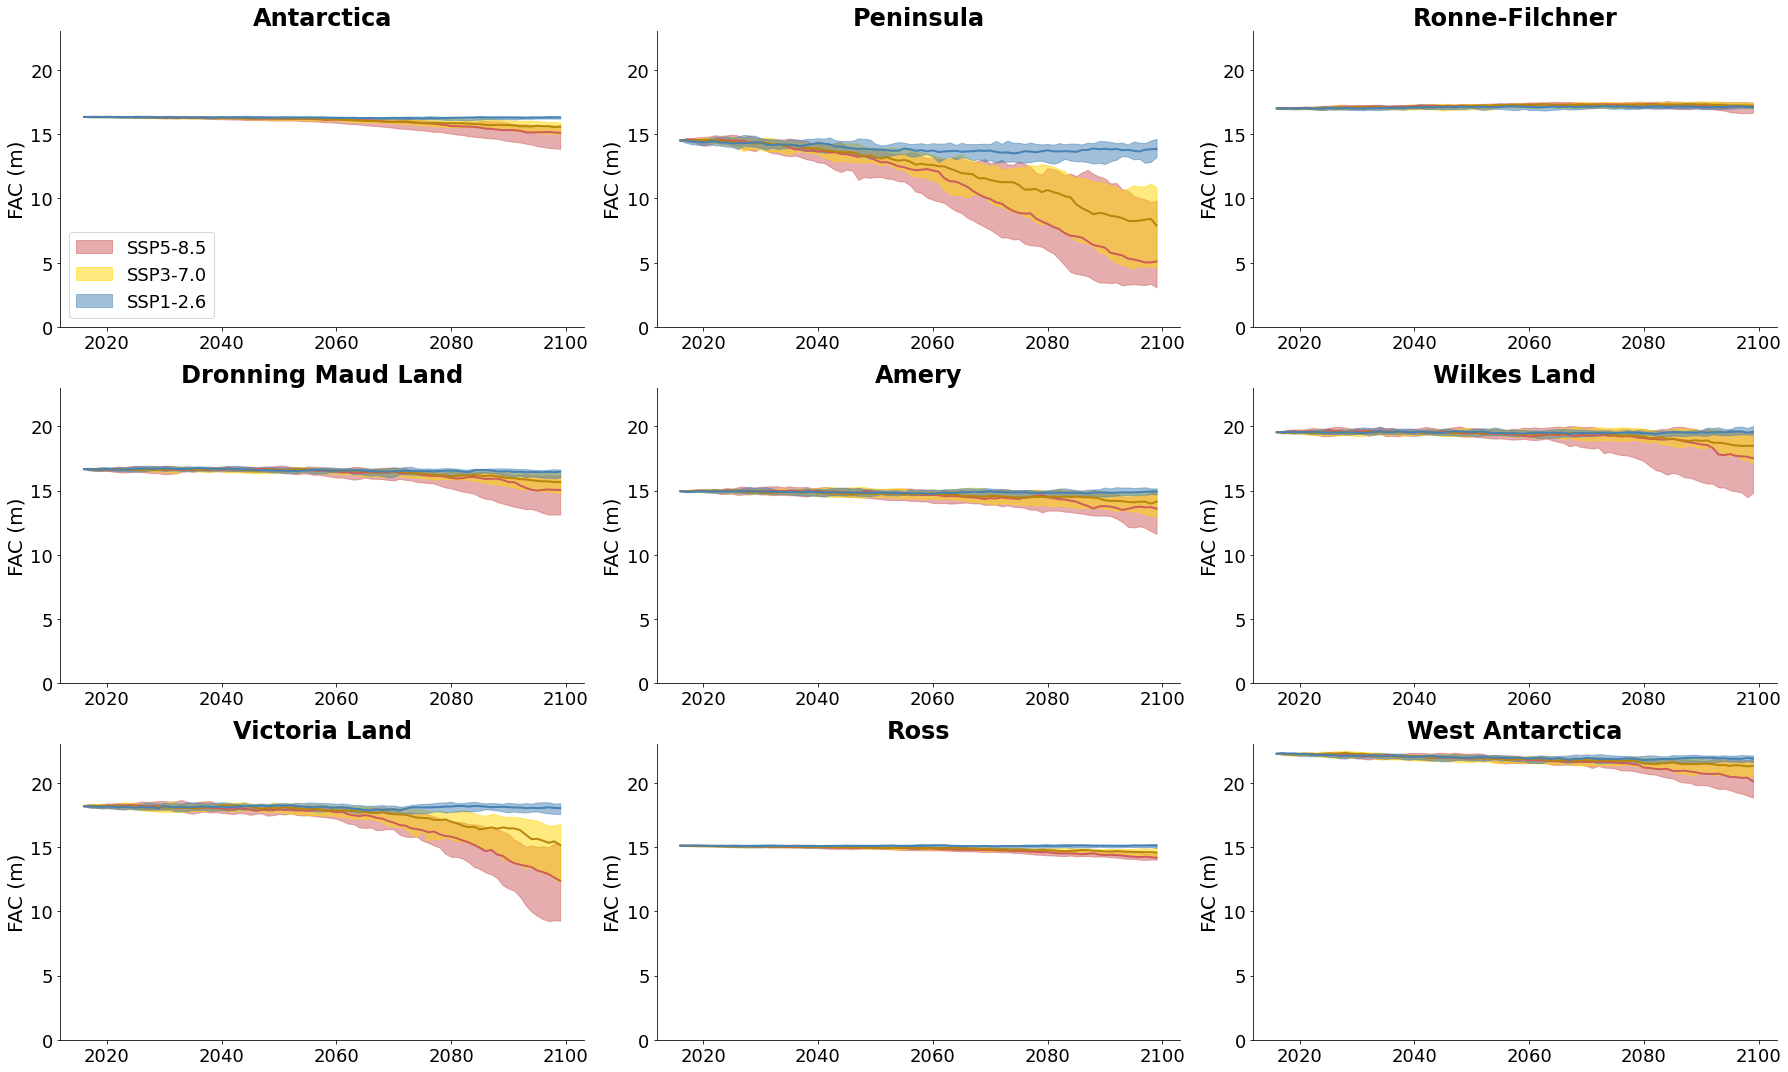

In [12]:
fig, ax = plt.subplots(3,3,figsize = (25,15))

plot_timeseries(ax[0,0],all1.ssp5,'Antarctica', 'SSP5-8.5', 'indianred', 'indianred', l=True)
plot_timeseries(ax[0,0],all1.ssp3,'Antarctica', 'SSP3-7.0', 'darkgoldenrod','gold', l=True)
plot_timeseries(ax[0,0],all1.ssp1,'Antarctica', 'SSP1-2.6', 'steelblue', 'steelblue', l=True)

plot_timeseries(ax[0,1],pen1.ssp5,'Peninsula', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[0,1],pen1.ssp3,'Peninsula', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[0,1],pen1.ssp1,'Peninsula', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[0,2],rf1.ssp5,'Ronne-Filchner', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[0,2],rf1.ssp3,'Ronne-Filchner', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[0,2],rf1.ssp1,'Ronne-Filchner', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[1,0],dml1.ssp5,'Dronning Maud Land', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[1,0],dml1.ssp3,'Dronning Maud Land', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[1,0],dml1.ssp1,'Dronning Maud Land', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[1,1],amery1.ssp5,'Amery', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[1,1],amery1.ssp3,'Amery', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[1,1],amery1.ssp1,'Amery', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[1,2],wilkes1.ssp5,'Wilkes Land', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[1,2],wilkes1.ssp3,'Wilkes Land', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[1,2],wilkes1.ssp1,'Wilkes Land', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[2,0],victoria1.ssp5,'Victoria Land', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[2,0],victoria1.ssp3,'Victoria Land', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[2,0],victoria1.ssp1,'Victoria Land', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[2,1],ross1.ssp5,'Ross', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[2,1],ross1.ssp3,'Ross', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[2,1],ross1.ssp1,'Ross', 'SSP1-2.6', 'steelblue', 'steelblue')

plot_timeseries(ax[2,2],west1.ssp5,'West Antarctica', 'SSP5-8.5', 'indianred', 'indianred')
plot_timeseries(ax[2,2],west1.ssp3,'West Antarctica', 'SSP3-7.0', 'darkgoldenrod', 'gold')
plot_timeseries(ax[2,2],west1.ssp1,'West Antarctica', 'SSP1-2.6', 'steelblue', 'steelblue')

plt.tight_layout()
#plt.savefig('figures/region_timeseries.png', dpi=300, transparent = True, bbox_inches = 'tight')

## region timeseries full range

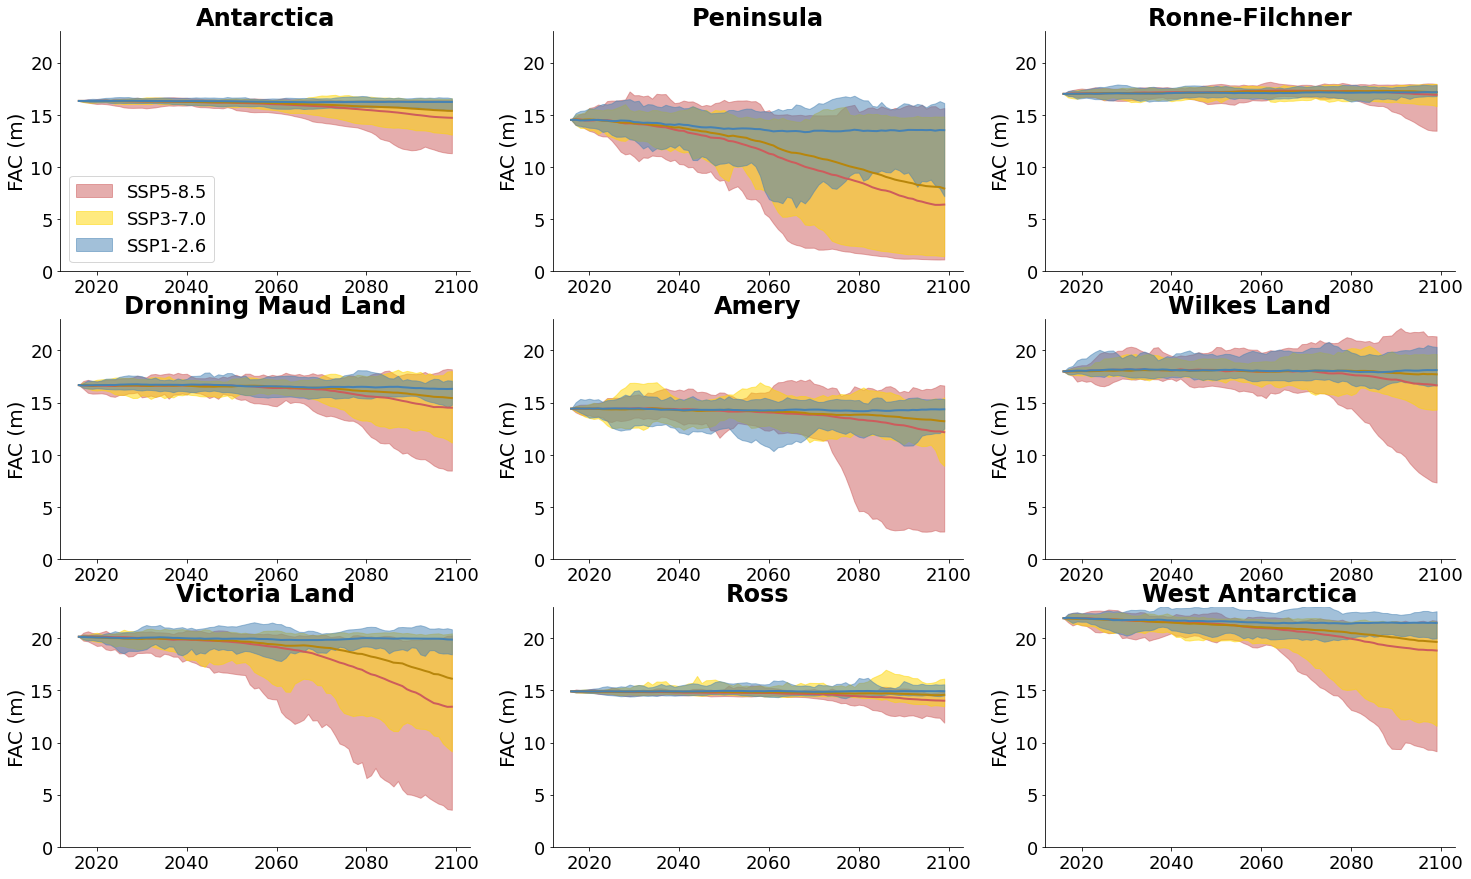

In [20]:
fig, ax = plt.subplots(3,3,figsize = (25,15))

plot_timeseries(ax[0,0],all1.ssp5,'Antarctica', 'SSP5-8.5', 'indianred', 'indianred', r = 'full', l=True)
plot_timeseries(ax[0,0],all1.ssp3,'Antarctica', 'SSP3-7.0', 'darkgoldenrod','gold', r = 'full', l=True)
plot_timeseries(ax[0,0],all1.ssp1,'Antarctica', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full', l=True)

plot_timeseries(ax[0,1],pen1.ssp5,'Peninsula', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[0,1],pen1.ssp3,'Peninsula', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[0,1],pen1.ssp1,'Peninsula', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[0,2],rf1.ssp5,'Ronne-Filchner', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[0,2],rf1.ssp3,'Ronne-Filchner', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[0,2],rf1.ssp1,'Ronne-Filchner', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[1,0],dml1.ssp5,'Dronning Maud Land', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[1,0],dml1.ssp3,'Dronning Maud Land', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[1,0],dml1.ssp1,'Dronning Maud Land', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[1,1],amery1.ssp5,'Amery', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[1,1],amery1.ssp3,'Amery', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[1,1],amery1.ssp1,'Amery', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[1,2],wilkes1.ssp5,'Wilkes Land', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[1,2],wilkes1.ssp3,'Wilkes Land', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[1,2],wilkes1.ssp1,'Wilkes Land', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[2,0],victoria1.ssp5,'Victoria Land', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[2,0],victoria1.ssp3,'Victoria Land', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[2,0],victoria1.ssp1,'Victoria Land', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[2,1],ross1.ssp5,'Ross', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[2,1],ross1.ssp3,'Ross', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[2,1],ross1.ssp1,'Ross', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')

plot_timeseries(ax[2,2],west1.ssp5,'West Antarctica', 'SSP5-8.5', 'indianred', 'indianred', r = 'full')
plot_timeseries(ax[2,2],west1.ssp3,'West Antarctica', 'SSP3-7.0', 'darkgoldenrod', 'gold', r = 'full')
plot_timeseries(ax[2,2],west1.ssp1,'West Antarctica', 'SSP1-2.6', 'steelblue', 'steelblue', r = 'full')


# ax[0,0].plot(all1.year, all1.sel(model = 'CESM2').ssp5, '--', color='maroon', label = 'CESM2')
# ax[0,1].plot(all1.year, pen1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[0,2].plot(all1.year, rf1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[1,0].plot(all1.year, dml1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[1,1].plot(all1.year, amery1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[1,2].plot(all1.year, wilkes1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[2,0].plot(all1.year, victoria1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[2,1].plot(all1.year, ross1.sel(model = 'CESM2').ssp5, '--', color='maroon')
# ax[2,2].plot(all1.year, west1.sel(model = 'CESM2').ssp5, '--', color='maroon')

plt.savefig('figures/region_timeseries_full_range.png', dpi=300, transparent = True, bbox_inches = 'tight')